#### Problem Defination
##### With the given dataset first to check what's kind of problem to be solved
    * Supervised / Unsupervised or Reinforcement
##### Then to find out which model is goint to be useful
    * Classification, Regression or Something Else
##### To Find out a performance measures
    * For regression it could be (RMSE, MSE,MAE..)
    * For classification it could be (Accuray, F1 Score, Precision..)

#### Working With Housing DataSet
##### Predicting the price of the house as numeric
##### Regression problems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

In [2]:
#raw_data = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')

In [3]:
#saving the data for using it locally

In [4]:
#raw_data.to_csv('housing_data.csv',index=False)

In [5]:
raw_data = pd.read_csv('housing_data.csv')

In [6]:
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
raw_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [8]:
raw_data.shape

(20640, 10)

##### We have 20640 rows and 10 columns
##### where each row represent a district
* District = US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

In [9]:
#checking all the columns/attributes 

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
#### Checking the missing rows 
raw_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
#we can see ['total_bedrooms'] missing 207 rows

In [13]:
### We can also check that there is a single column that has object dataType
raw_data['ocean_proximity'].dtype

dtype('O')

In [14]:
### Checking the value_count()
raw_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
### Now to get a quick statastical information about all the numeric value we can use describe method()
raw_data.describe() #it will exclude all object dtype #it will also ignore all missing values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [16]:
#std = how much distributes or spread over the values are
#othere are 25% to max they are referes as percentile or quartile where they show the median value on that range


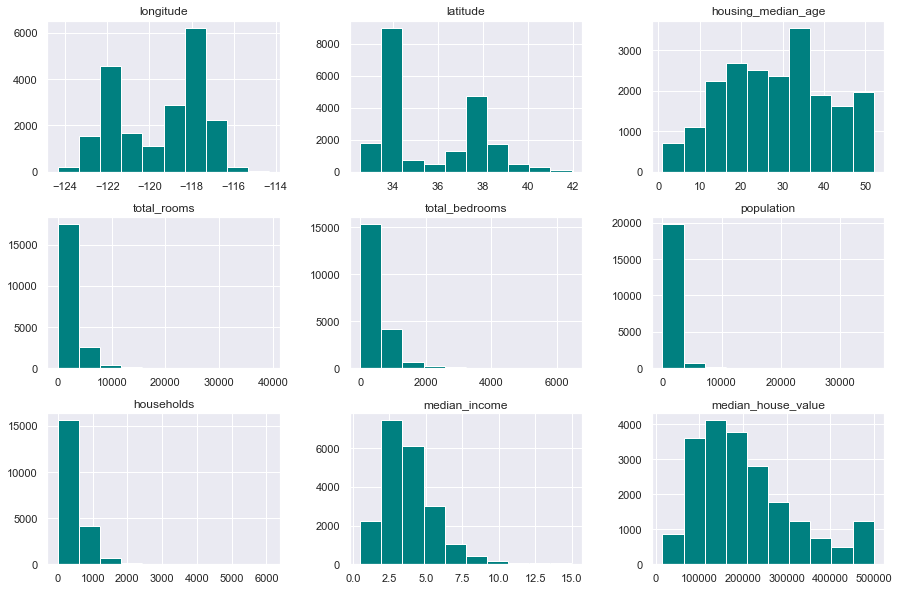

In [17]:
#We can visualize the distribution of the whole dataset on numeric columns

raw_data.hist(figsize=(15,10),bins=10,color='teal') #bins = 10 ; seperated by 10 binning
plt.show()


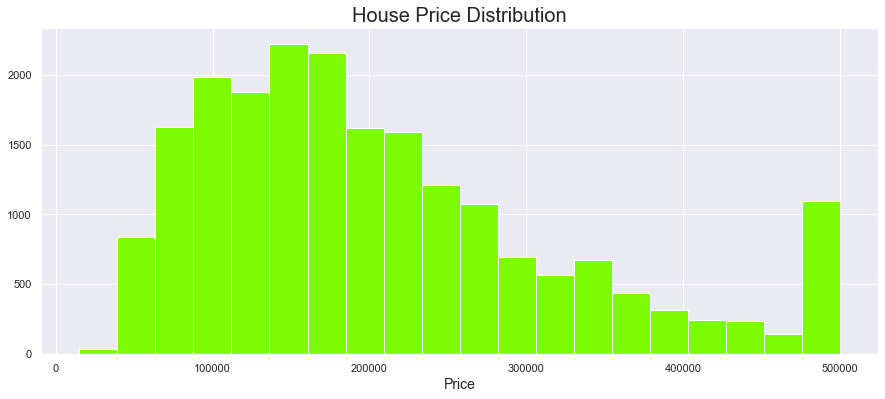

In [18]:
#we can also check the distribuiton on single column/attribute
raw_data['median_house_value'].hist(figsize=(15,6),color='lawngreen',bins=20)
plt.title('House Price Distribution',fontsize=20)
plt.xlabel('Price',fontsize=14)

plt.show()


In [19]:
### Theres something odd in ['Median Income Value']

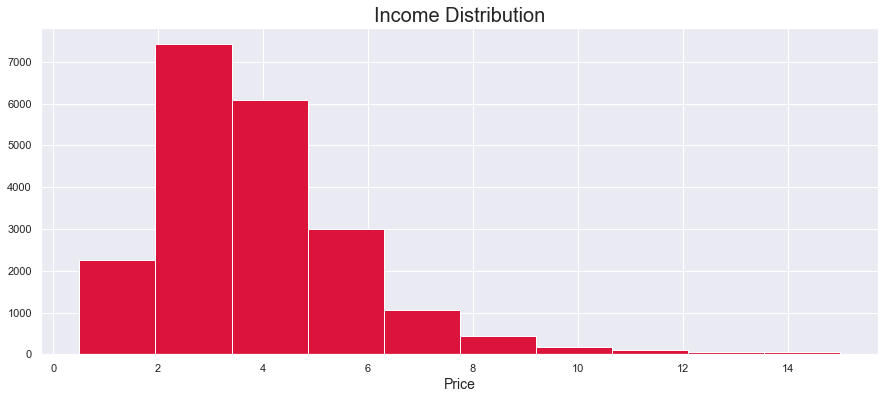

In [20]:
raw_data['median_income'].hist(figsize=(15,6),color='crimson',bins=10)
plt.title('Income Distribution',fontsize=20)
plt.xlabel('Price',fontsize=14)


plt.show()

In [21]:
## How come price income be so low
## By getting more info about the data we can see the income price is capped.
## Best practice to always know your data, even if it won't necessary

In [22]:
## with further research we get the info that ['House Median Price'] is also capped data
## which can be a problem or not depeding on the result , as with using this data,
## the prediction result will never show the real price

#### Train_Test_Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#creating a train and test samples for future evaluation
train_set, test_set = train_test_split(raw_data,test_size=0.2,random_state =123)


In [28]:
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [30]:
#But spliting data like this could give result poorly
#As we dont know which 20% split of data is good for testing, as it's randomly distributing all the rows.
#To ignroe it we can do stratified sampling

#### Stratified sampling

In [31]:
#From the research it has been said that ['Median Income'] is the major column/attribute to predict housing price

In [32]:
#quick visualization of median income

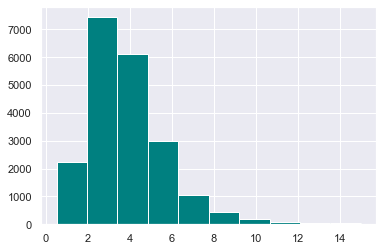

In [33]:
raw_data['median_income'].hist(color='teal');

In [40]:
#We could categorize ['Median Income'] for getting a stratified sampling
data = raw_data.copy()
data['income_category'] = pd.cut(data['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

In [43]:
#pd.cut(data['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
#taking the data['median_income'] and distributing 5 bins, 
# 0-1.5 will have label/category 1
# 1.5-3 will have label/category 2
# 3-4.5 wil have label/category 3
# 4.5-6 will have label/category 4
# 6-infinite will have label/category 5

In [44]:
#plotting new ['income_category']

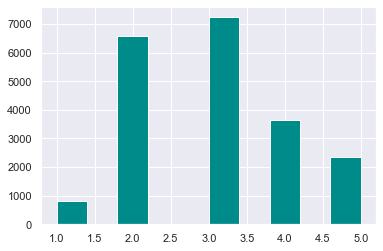

In [49]:
data['income_category'].hist(color='darkcyan');

In [50]:
#we now have 5 category of ['Meian Income']

##### Stratified sampling based on [Income Category]

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit

In [53]:
data_split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=123)

In [55]:
for train_index,test_index in data_split.split(data,data['income_category']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [57]:
strat_train_set.shape, strat_test_set.shape

((16512, 11), (4128, 11))

In [60]:
strat_train_set['income_category'].value_counts() / len(strat_test_set) 

3    1.402374
2    1.275436
4    0.705184
5    0.457607
1    0.159399
Name: income_category, dtype: float64

In [61]:
#We could see everything looks ok. the value is decreasing with a similar distribuion

##### Now we can drop the ['income category']

In [63]:
strat_train_set.drop('income_category',axis=1,inplace=True)
strat_test_set.drop('income_category',axis=1,inplace=True)

In [65]:
strat_train_set.shape, strat_test_set.shape

((16512, 10), (4128, 10))

In [66]:
data_train = strat_train_set.copy()
data_test = strat_test_set.copy()

#### Checking visualization of new data

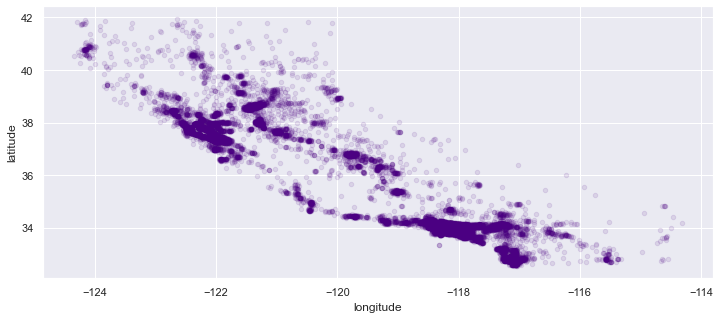

In [111]:
#checking a scatter plot
# checking the higher density area
data_train.plot(kind='scatter',x='longitude',y ='latitude',c='indigo',figsize=(12,5),alpha=0.1);

In [76]:
#Check the wikipedia for longitude or latitude to understand better which area has the higest density

In [77]:
#visualizing the area with ['Median House Price'] to know better where the house price is highest

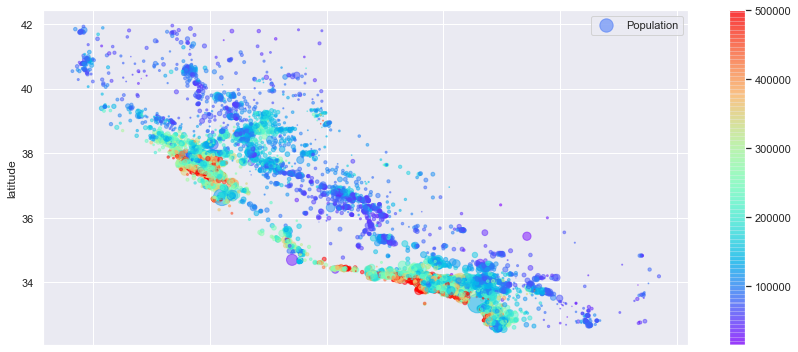

In [118]:


data_train.plot(kind='scatter',x='longitude',y='latitude',alpha=0.5,
         s=data_train['population']/100,label='Population',figsize=(12,5),c=data_train['median_house_value'],cmap='rainbow',colorbar=True)
plt.legend()
plt.tight_layout()
plt.show()

In [120]:
#we can see the highest house price values are the area near the ocean

#### CHecking a corelation

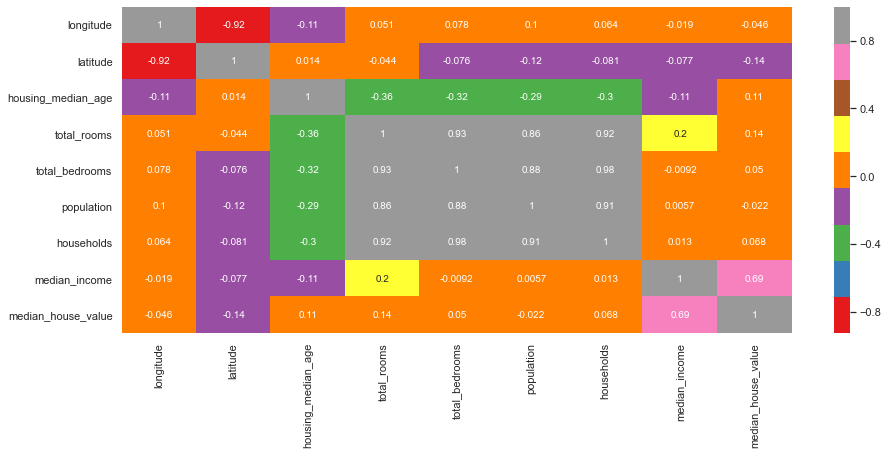

In [126]:
plt.figure(figsize=(15,6))
sns.heatmap(data_train.corr(),annot=True,cmap='Set1');

In [132]:
#+1 corelation means the label value will increase as the positive column value increase
#-1 corelation means the label value will decrease as the negative column value increase

In [133]:
# CHecking the co_relation of ['Median House Value']
corr_matrix = data_train.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688853
total_rooms           0.135447
housing_median_age    0.110739
households            0.067613
total_bedrooms        0.050304
population           -0.022356
longitude            -0.046048
latitude             -0.144789
Name: median_house_value, dtype: float64

In [134]:
#we can check it by visualizing it

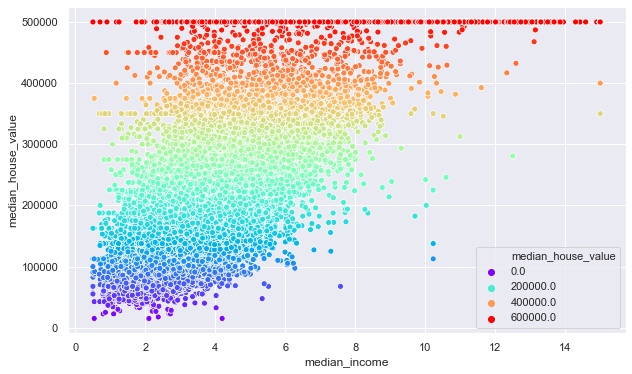

In [140]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_train,x='median_income',y='median_house_value',hue='median_house_value',palette='rainbow');

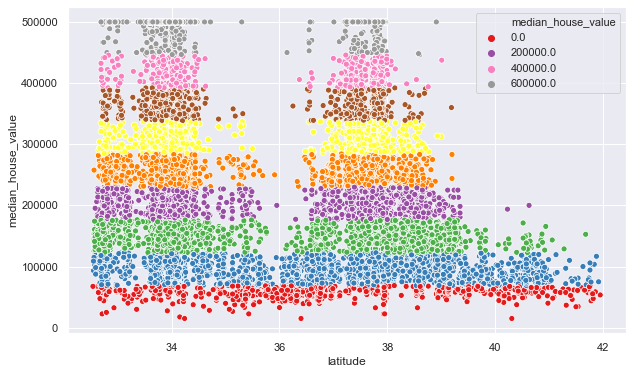

In [143]:
#now let's check a negative co-relation
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_train,x='latitude',y='median_house_value',hue='median_house_value',palette='Set1');

In [142]:
#we can see the more the value of latitude increase the median_house_value is decreasing

In [144]:
#Now looking at the data. We can see some Feature/attribute are not explaning a enough
data_train['total_rooms'].max(), data_train['total_rooms'].min()

(37937.0, 8.0)

In [148]:
#it would be better if we could know the room_per_household
round(data_train['total_rooms'][:10]/data_train['households'][:10])

10888    5.0
2092     5.0
18810    6.0
6905     5.0
10102    5.0
7968     3.0
13122    6.0
7464     5.0
19132    6.0
16897    6.0
dtype: float64

In [149]:
#Also Rooms per households and Population per households
#creating new columns with it
data_train_plus = data_train.copy()

In [152]:
data_train_plus['rooms_n'] = round(data_train_plus['total_rooms']/data_train_plus['households'])
data_train_plus['bedrooms_n'] = round(data_train_plus['total_bedrooms']/data_train_plus['households'])
data_train_plus['population_n'] = round(data_train_plus['population']/data_train_plus['households'])

In [153]:
data_train_plus.shape

(16512, 13)

In [154]:
#checking new correlations
corr_matrix2 = data_train_plus.corr()
corr_matrix2['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688853
rooms_n               0.145664
total_rooms           0.135447
housing_median_age    0.110739
households            0.067613
total_bedrooms        0.050304
population_n         -0.021546
population           -0.022356
bedrooms_n           -0.035000
longitude            -0.046048
latitude             -0.144789
Name: median_house_value, dtype: float64

In [155]:
#we can see room_n (room per household) has better corelation than many columns/attribute